<a href="https://colab.research.google.com/github/ftk1000/torch_demos/blob/master/poly_regression_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# poly_regression_v2.ipynb
# https://github.com/ftk1000/torch_demos/blob/master/poly_regression.ipynb

In [1]:
import torch
import torch.nn.functional as F

POLY_DEGREE = 4
W_target = torch.randn(POLY_DEGREE, 1) * 5
b_target = torch.randn(1) * 5
print(W_target)
print(b_target)

# Define model
fc = torch.nn.Linear(W_target.size(0), 1)
fc

tensor([[-0.1159],
        [ 3.6515],
        [ 1.5590],
        [ 2.7720]])
tensor([6.5148])


Linear(in_features=4, out_features=1, bias=True)

In [2]:
# GENERATE DATA
##### get batch
"""Builds a batch i.e. (x, f(x)) pair."""
batch_size=32
random = torch.randn(batch_size)
### x = make_features(random)
"""Builds features i.e. a matrix with columns [x, x^2, x^3, x^4]."""
x = random.unsqueeze(1)
batch_x = torch.cat([x ** i for i in range(1, POLY_DEGREE+1)], 1)
# return torch.cat([x ** i for i in range(1, POLY_DEGREE+1)], 1)

batch_y = batch_x.mm(W_target) + b_target.item()
# return x, y

print(batch_x[:2])
print(batch_y[:2])

tensor([[ 1.6257,  2.6428,  4.2963,  6.9843],
        [-1.2531,  1.5703, -1.9678,  2.4658]])
tensor([[42.0347],
        [16.1617]])


In [3]:
# TRAIN LOOP
losses=[]
Nsteps = 1000
for i in range(Nsteps):
  # Reset gradients
  fc.zero_grad()

  # Forward pass
  output = F.smooth_l1_loss(fc(batch_x), batch_y)
  # print(output)
  loss = output.item()
  # print(loss)

  # Backward pass
  output.backward()

  # Apply gradients
  for param in fc.parameters():
      param.data.add_(-0.1 * param.grad)
  losses.append(loss)
  # print(fc.parameters)

[1.715436326321651e-08,
 1.6939910807423075e-08,
 1.6768773036801576e-08,
 1.6575786077055454e-08,
 1.6386220380582017e-08,
 1.6206289643605487e-08]

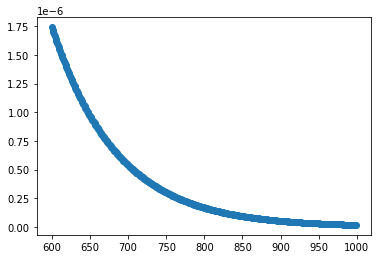

In [8]:
import matplotlib.pyplot as plt
steps = range(len(losses))
offset=600
plt.scatter(steps[offset:], losses[offset:]  )

losses[-6:]